<a href="https://colab.research.google.com/github/thangaz/tweet-classifier/blob/master/tweet_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git init

Initialized empty Git repository in /content/.git/


In [7]:
cd mkdir new

[Errno 2] No such file or directory: 'mkdir new'
/content


In [0]:
import pandas as pd
import numpy as np
from tensorflow import keras 
import tensorflow as tf
import os
import re
import pickle

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model_file='/content/drive/My Drive/tweets/model.h5'
model=keras.models.load_model(model_file)
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 20)           4206780   
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 120, 30)           1830      
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 120, 20)         

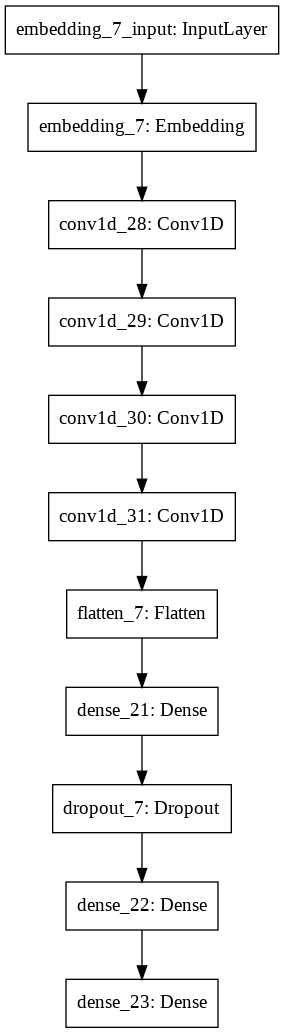

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/model.png')

In [0]:
file_dir='/content/drive/My Drive/conservatives/'
os.listdir(file_dir)

['cons2019-09-05.csv',
 'cons2019-09-06.csv',
 'cons2019-09-07.csv',
 'cons2019-09-09.csv',
 'cons2019-09-08.csv',
 'cons2019-09-10.csv',
 'cons2019-09-11.csv',
 'cons2019-09-12.csv',
 'cons2019-09-13.csv',
 'cons2019-09-14.csv',
 'cons2019-08-31.csv',
 'cons2019-09-01.csv',
 'cons2019-09-04.csv',
 'cons2019-09-15.csv',
 'cons2019-09-16.csv',
 'cons2019-09-17.csv',
 'cons2019-09-18.csv',
 'cons2019-09-19.csv',
 'cons2019-09-20.csv',
 'cons2019-09-21.csv',
 'cons2019-09-22.csv',
 'cons2019-09-23.csv',
 'cons2019-09-24.csv',
 'cons2019-09-25.csv',
 'cons2019-09-26.csv',
 'cons2019-09-27.csv',
 'cons2019-09-28.csv',
 'cons2019-09-29.csv',
 'cons2019-09-30.csv',
 'cons2019-10-01.csv',
 'cons2019-10-02.csv',
 'cons2019-10-03.csv',
 'cons2019-10-04.csv',
 'cons2019-10-05.csv',
 'cons2019-10-06.csv',
 'cons2019-10-07.csv',
 'cons2019-10-08.csv',
 'cons2019-10-09.csv',
 'cons2019-10-10.csv',
 'cons2019-10-11.csv',
 'cons2019-10-12.csv',
 'cons2019-10-13.csv',
 'cons2019-10-15.csv',
 'cons2019-

In [0]:
num_words=120
def pre_process(comment):
  tokens=tokenizer.texts_to_sequences(keras.preprocessing.text.text_to_word_sequence(comment))
  vector=np.array(tokens).reshape(len(tokens))
  if len(vector>num_words):
    vector=vector[0:num_words]

  return np.pad(vector,((0,num_words-len(vector))),'constant', constant_values=(0,0))

In [0]:
#get rid of usernames on tweets
def u_names(tweet):
  return re.sub('@[^\s]+','',tweet)

In [0]:
tweets=[]
for tweet_file in os.listdir(file_dir):
  csv=pd.read_csv(file_dir+tweet_file)
  temp=csv.text.apply(u_names).values
  tweets.append(temp)


In [0]:
test_y=np.zeros_like(tweets[0])

In [0]:
#load word embedding
with open('/content/drive/My Drive/tweets/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [0]:
def feed_data(tweets):
  return np.array([pre_process(tweet) for tweet in tweets])

In [0]:
results_average={}
file_names=[]
for tweet_file in os.listdir(file_dir):
  csv=pd.read_csv(file_dir+tweet_file)
  temp=csv.text.apply(u_names).values
  data=feed_data(temp)
  output=model.predict(data)
  results_average.update({tweet_file[-14:-4] : output.mean()})
  file_names.append(tweet_file)
  print(tweet_file,output.mean())
#res=np.column_stack((file_names,results1))
#res
 # if tweet_file.startswith("@BorisJohnson"):
  #  boris[tweet_file[-18:-4]]=output.mean()
    
  #elif tweet_file.startswith("@JustinTrudeau"):
   # justin[tweet_file[-18:-4]]=output.mean()
  #else:
    #donald[tweet_file[-18:-4]]=output.mean()

cons2019-09-05.csv 0.13993624
cons2019-09-06.csv 0.14785564
cons2019-09-07.csv 0.14905246
cons2019-09-09.csv 0.12753682
cons2019-09-08.csv 0.14660938
cons2019-09-10.csv 0.18165691
cons2019-09-11.csv 0.15025814
cons2019-09-12.csv 0.1314218
cons2019-09-13.csv 0.11842573
cons2019-09-14.csv 0.111277506
cons2019-08-31.csv 0.1487393
cons2019-09-01.csv 0.13851605
cons2019-09-04.csv 0.15730852
cons2019-09-15.csv 0.2157964
cons2019-09-16.csv 0.15606771
cons2019-09-17.csv 0.15565366
cons2019-09-18.csv 0.13166559
cons2019-09-19.csv 0.13599826
cons2019-09-20.csv 0.13779044
cons2019-09-21.csv 0.13938598
cons2019-09-22.csv 0.11823947
cons2019-09-23.csv 0.14847939
cons2019-09-24.csv 0.13643713
cons2019-09-25.csv 0.24959998
cons2019-09-26.csv 0.14150256
cons2019-09-27.csv 0.09834511
cons2019-09-28.csv 0.14537217
cons2019-09-29.csv 0.1467103
cons2019-09-30.csv 0.15433648
cons2019-10-01.csv 0.15086731
cons2019-10-02.csv 0.1131884
cons2019-10-03.csv 0.08877733
cons2019-10-04.csv 0.11162285
cons2019-10-05

In [0]:
test_output=model.predict_classes(feed_data(tweets[0]))
test_output.sum()/1000

0.071

In [0]:
results_freq={}
file_names_freq=[]
for tweet_file in os.listdir(file_dir):
  csv=pd.read_csv(file_dir+tweet_file)
  temp=csv.text.apply(u_names).values
  data=feed_data(temp)
  output=model.predict_classes(data)
  results_freq.update({tweet_file[-14:-4] :(1000 - output.sum())/1000})
  file_names_freq.append(tweet_file)
  print(tweet_file,(output.sum())/1000)

cons2019-09-05.csv 0.071
cons2019-09-06.csv 0.121
cons2019-09-07.csv 0.108
cons2019-09-09.csv 0.094
cons2019-09-08.csv 0.105
cons2019-09-10.csv 0.167
cons2019-09-11.csv 0.132
cons2019-09-12.csv 0.099
cons2019-09-13.csv 0.086
cons2019-09-14.csv 0.083
cons2019-08-31.csv 0.14
cons2019-09-01.csv 0.117
cons2019-09-04.csv 0.12
cons2019-09-15.csv 0.228
cons2019-09-16.csv 0.123
cons2019-09-17.csv 0.144
cons2019-09-18.csv 0.055
cons2019-09-19.csv 0.08
cons2019-09-20.csv 0.12
cons2019-09-21.csv 0.093
cons2019-09-22.csv 0.087
cons2019-09-23.csv 0.081
cons2019-09-24.csv 0.11
cons2019-09-25.csv 0.221
cons2019-09-26.csv 0.074
cons2019-09-27.csv 0.069
cons2019-09-28.csv 0.103
cons2019-09-29.csv 0.106
cons2019-09-30.csv 0.119
cons2019-10-01.csv 0.133
cons2019-10-02.csv 0.083
cons2019-10-03.csv 0.053
cons2019-10-04.csv 0.083
cons2019-10-05.csv 0.119
cons2019-10-06.csv 0.062
cons2019-10-07.csv 0.089
cons2019-10-08.csv 0.178
cons2019-10-09.csv 0.113
cons2019-10-10.csv 0.203
cons2019-10-11.csv 0.11
cons20

In [0]:
import datetime

start = datetime.datetime.strptime("2019-08-31", "%Y-%m-%d")
end = datetime.datetime.strptime("2019-10-22",  "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    print (date.strftime("%Y-%m-%d"))

2019-08-31
2019-09-01
2019-09-02
2019-09-03
2019-09-04
2019-09-05
2019-09-06
2019-09-07
2019-09-08
2019-09-09
2019-09-10
2019-09-11
2019-09-12
2019-09-13
2019-09-14
2019-09-15
2019-09-16
2019-09-17
2019-09-18
2019-09-19
2019-09-20
2019-09-21
2019-09-22
2019-09-23
2019-09-24
2019-09-25
2019-09-26
2019-09-27
2019-09-28
2019-09-29
2019-09-30
2019-10-01
2019-10-02
2019-10-03
2019-10-04
2019-10-05
2019-10-06
2019-10-07
2019-10-08
2019-10-09
2019-10-10
2019-10-11
2019-10-12
2019-10-13
2019-10-14
2019-10-15
2019-10-16
2019-10-17
2019-10-18
2019-10-19
2019-10-20
2019-10-21


In [0]:
rslt=(1-np.array(list(results_average.values())))
rslt.shape

(52,)

In [0]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

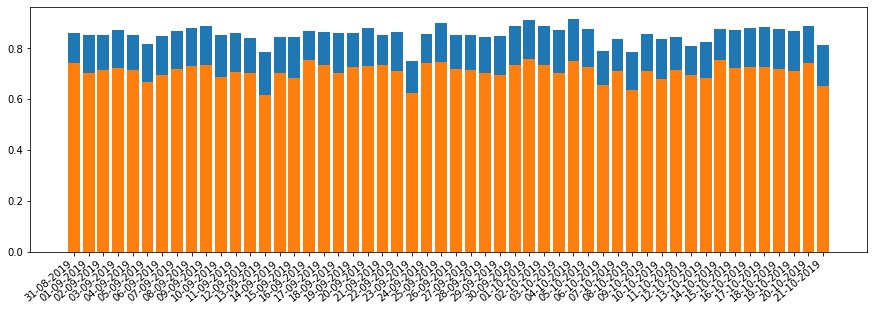

In [0]:
fig,ax=plt.subplots(1,1)
ax.bar([datet.strftime("%d-%m-%Y") for datet in date_generated][:52],rslt)
ax.bar([datet.strftime("%d-%m-%Y") for datet in date_generated][:52],0.8*np.array(list(results_freq.values())))
fig.autofmt_xdate(rotation=40)

No handles with labels found to put in legend.


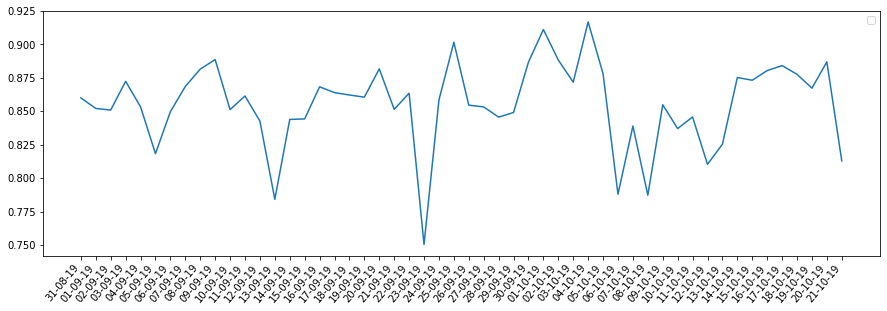

In [0]:
fig,ax=plt.subplots(1,1)
ax.plot([datet.strftime("%d-%m-%y") for datet in date_generated][:52],rslt)
fig.autofmt_xdate(rotation=50)
ax.legend()

In [0]:
dates=[]
resul=[]
for date in date_generated:
 
  if date.strftime("%Y-%m-%d") in results_average.keys():
    dates.append(date.strftime("%Y-%m-%d"))
    resul.append(results_average[date.strftime("%Y-%m-%d")])
  else:
    dates.append(date.strftime("%Y-%m-%d"))
    resul.append(np.nan)


In [0]:
dates=[]
resul_freq=[]
for date in date_generated:
 
  if date.strftime("%Y-%m-%d") in results_average.keys():
    dates.append(date.strftime("%Y-%m-%d"))
    resul_freq.append(results_freq[date.strftime("%Y-%m-%d")])
  else:
    dates.append(date.strftime("%Y-%m-%d"))
    resul_freq.append(np.nan)
resul_freq

[0.86,
 0.883,
 nan,
 nan,
 0.88,
 0.929,
 0.879,
 0.892,
 0.895,
 0.906,
 0.833,
 0.868,
 0.901,
 0.914,
 0.917,
 0.772,
 0.877,
 0.856,
 0.945,
 0.92,
 0.88,
 0.907,
 0.913,
 0.919,
 0.89,
 0.779,
 0.926,
 0.931,
 0.897,
 0.894,
 0.881,
 0.867,
 0.917,
 0.947,
 0.917,
 0.881,
 0.938,
 0.911,
 0.822,
 0.887,
 0.797,
 0.89,
 0.849,
 0.895,
 0.904,
 0.87,
 0.856,
 0.942,
 0.909,
 0.909,
 0.901,
 0.891]

In [0]:
polls={"2019-08-31":35,"2019-09-06":(31+35+31+35+29)/5,"2019-09-07":31,"2019-09-08":30,"2019-09-09":38,"2019-09-10":32,"2019-09-12":28,"2019-09-13":37,"2019-09-16":33,"2019-09-18":32,"2019-09-19":29,"2019-09-20":37,"2019-09-24":27,
       "2019-09-25":(27+33)/2,"2019-09-27":(33+36)/2,"2019-10-01":34,"2019-10-04":(31+38)/2,"2019-10-06":33,"2019-10-09":35,"2019-10-10":33,"2019-10-11":33,"2019-10-15":37,"2019-10-17":33,"2019-10-18":(36+32)/2,"2019-10-21":37}

In [0]:
polls1={"2019-08-31":33.3,"2019-09-06":33.3,"2019-09-08":32.8,"2019-09-10":32.8,"2019-09-12":32.9,"2019-09-16":32.4,"2019-09-19":32.4,"2019-09-20":33.1,"2019-09-24":32.9,
       "2019-09-25":32.6,"2019-09-27":32.1,"2019-10-01":31.9,"2019-10-04":32,"2019-10-06":32.2,"2019-10-09":32.4,"2019-10-10":32.7,"2019-10-11":33.3,"2019-10-15":34,"2019-10-17":34.5,"2019-10-18":34.8,"2019-10-21":34.8}

In [0]:
pol=[]
dates=[]
for date in date_generated:
  if date.strftime("%Y-%m-%d") in polls.keys():
    dates.append(date.strftime("%Y-%m-%d"))
    pol.append(polls[date.strftime("%Y-%m-%d")])
  else:
    dates.append(date.strftime("%Y-%m-%d"))
    pol.append(np.nan)
dates

['2019-08-31',
 '2019-09-01',
 '2019-09-02',
 '2019-09-03',
 '2019-09-04',
 '2019-09-05',
 '2019-09-06',
 '2019-09-07',
 '2019-09-08',
 '2019-09-09',
 '2019-09-10',
 '2019-09-11',
 '2019-09-12',
 '2019-09-13',
 '2019-09-14',
 '2019-09-15',
 '2019-09-16',
 '2019-09-17',
 '2019-09-18',
 '2019-09-19',
 '2019-09-20',
 '2019-09-21',
 '2019-09-22',
 '2019-09-23',
 '2019-09-24',
 '2019-09-25',
 '2019-09-26',
 '2019-09-27',
 '2019-09-28',
 '2019-09-29',
 '2019-09-30',
 '2019-10-01',
 '2019-10-02',
 '2019-10-03',
 '2019-10-04',
 '2019-10-05',
 '2019-10-06',
 '2019-10-07',
 '2019-10-08',
 '2019-10-09',
 '2019-10-10',
 '2019-10-11',
 '2019-10-12',
 '2019-10-13',
 '2019-10-14',
 '2019-10-15',
 '2019-10-16',
 '2019-10-17',
 '2019-10-18',
 '2019-10-19',
 '2019-10-20',
 '2019-10-21']

In [0]:
def interpolate_gaps(values, limit=None):
    """
    Fill gaps using linear interpolation, optionally only fill gaps up to a
    size of `limit`.
    """
    values = np.asarray(values)
    i = np.arange(values.size)
    valid = np.isfinite(values)
    filled = np.interp(i, i[valid], values[valid])
    return filled

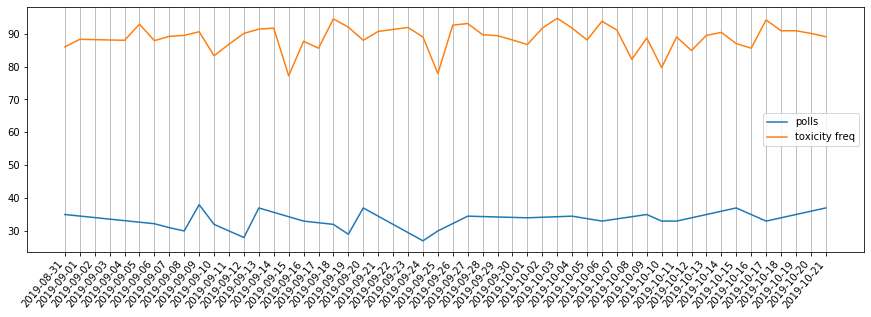

In [0]:
fig,ax1=plt.subplots(1,1)
ax1.plot(dates,interpolate_gaps(pol),label="polls")
#ax1.plot(dates,(100-100*interpolate_gaps(resul)),label="toxicity average")
ax1.plot(dates,(100*interpolate_gaps(resul_freq)),label="toxicity freq")
ax1.grid(axis="x")
ax1.legend()
fig.autofmt_xdate(rotation=50)

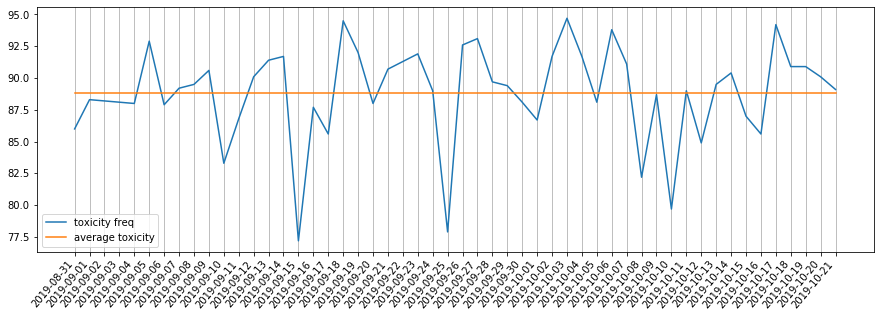

In [0]:
fig,ax1=plt.subplots(1,1)
ax1.plot(dates,(100*interpolate_gaps(resul_freq)),label="toxicity freq")
ax1.plot(dates,(np.mean(100*interpolate_gaps(resul_freq))*np.ones_like(resul_freq)),label="average toxicity")
ax1.grid(axis="x")
ax1.legend()
fig.autofmt_xdate(rotation=50)

In [0]:
  plt.plot(dates,interpolate_gaps(pol),label="polls")
plt.plot(dates,(-100*interpolate_gaps(resul)+100*interpolate_gaps(resul_freq)),label="toxicity average")

plt.grid(axis="x")
plt.legend()

In [0]:
plt.plot(dates,interpolate_gaps(pol),label="polls")
plt.plot(dates,(100-100*interpolate_gaps(resul_freq)),label="toxicity average")
plt.grid(axis="x")
plt.legend()

In [0]:
y1=np.convolve((100-100*interpolate_gaps(resul)),np.ones(3)/3,mode='valid')
y2=np.convolve(interpolate_gaps(pol),np.ones(3)/3,mode='valid')
fig,ax=plt.subplots(1,1)
ax.plot([date[3:] for date in dates[1:-1]],y1,label="toxicity")
ax.plot([date[3:] for date in dates[1:-1]],y2,label="polls")
ax.grid(axis="x")
ax.legend()
fig.autofmt_xdate(rotation=50)

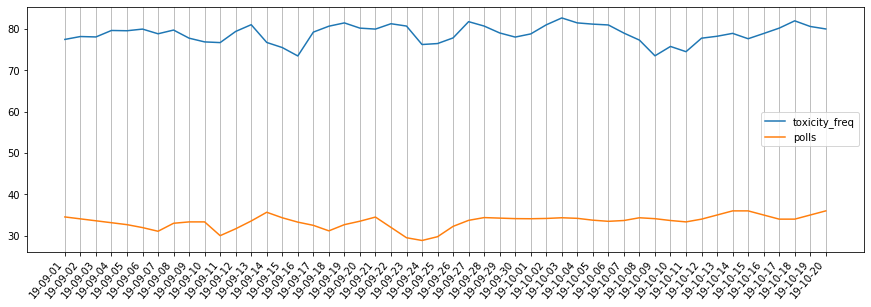

In [0]:
y1=np.convolve((100*interpolate_gaps(resul_freq)-10),np.ones(3)/3,mode='valid')
y2=np.convolve(interpolate_gaps(pol),np.ones(3)/3,mode='valid')
#y3=np.convolve((100-100*interpolate_gaps(resul)),np.ones(3)/3,mode='valid')
fig,ax=plt.subplots(1,1)
ax.plot([date[2:] for date in dates[1:-1]],y1,label="toxicity_freq")
ax.plot([date[2:] for date in dates[1:-1]],y2,label="polls")
#ax.plot([date[2:] for date in dates[1:-1]],y3,label="toxicity_score")
ax.legend()
ax.grid(axis="x")
fig.autofmt_xdate(rotation=50)

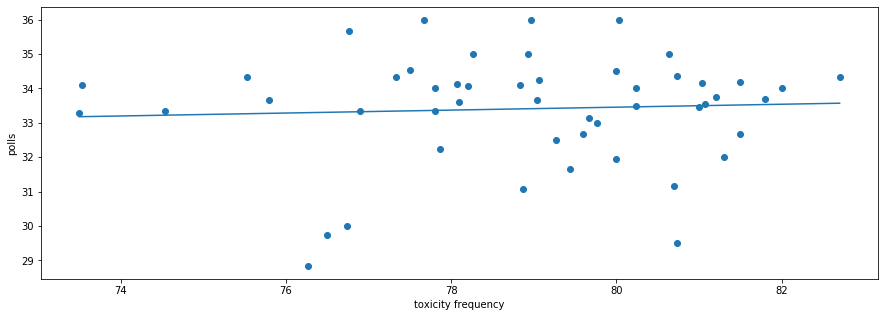

In [0]:
plt.scatter(y1,y2)
plt.xlabel("toxicity frequency")
plt.ylabel("polls")
plt.plot(np.unique(y1), np.poly1d(np.polyfit(y1, y2, 1))(np.unique(y1)))

In [0]:
df=pd.DataFrame(np.column_stack((y1,y2)))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf1f415ba8>,
      dtype=object)

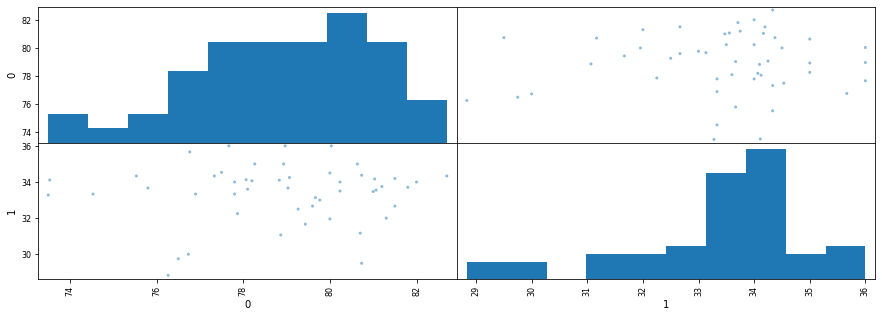

In [0]:
pd.plotting.scatter_matrix(df)

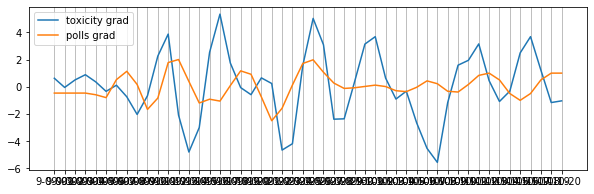

In [0]:
z1=np.gradient(y1)
z2=np.gradient(y2)
plt.plot([date[3:] for date in dates[1:-1]],z1,label="toxicity grad")
plt.plot([date[3:] for date in dates[1:-1]],z2,label="polls grad")
plt.legend()
plt.grid(axis="x")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc116f8208>,
      dtype=object)

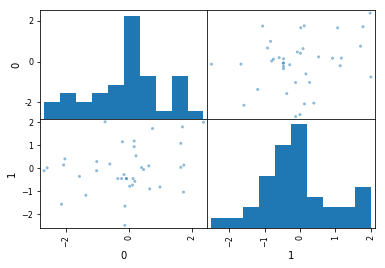

In [0]:
der=pd.DataFrame(np.column_stack((z1,z2)))
pd.plotting.scatter_matrix(der)

In [0]:
str(a)[2]

NameError: ignored

In [0]:
x=""

In [0]:
len(x)

0

In [0]:
pol1=[]
dates=[]
for date in date_generated:
  if date.strftime("%Y-%m-%d") in polls1.keys():
    dates.append(date.strftime("%Y-%m-%d"))
    pol1.append(polls1[date.strftime("%Y-%m-%d")])
  else:
    dates.append(date.strftime("%Y-%m-%d"))
    pol1.append(np.nan)
dates

['2019-08-31',
 '2019-09-01',
 '2019-09-02',
 '2019-09-03',
 '2019-09-04',
 '2019-09-05',
 '2019-09-06',
 '2019-09-07',
 '2019-09-08',
 '2019-09-09',
 '2019-09-10',
 '2019-09-11',
 '2019-09-12',
 '2019-09-13',
 '2019-09-14',
 '2019-09-15',
 '2019-09-16',
 '2019-09-17',
 '2019-09-18',
 '2019-09-19',
 '2019-09-20',
 '2019-09-21',
 '2019-09-22',
 '2019-09-23',
 '2019-09-24',
 '2019-09-25',
 '2019-09-26',
 '2019-09-27',
 '2019-09-28',
 '2019-09-29',
 '2019-09-30',
 '2019-10-01',
 '2019-10-02',
 '2019-10-03',
 '2019-10-04',
 '2019-10-05',
 '2019-10-06',
 '2019-10-07',
 '2019-10-08',
 '2019-10-09',
 '2019-10-10',
 '2019-10-11',
 '2019-10-12',
 '2019-10-13',
 '2019-10-14',
 '2019-10-15',
 '2019-10-16',
 '2019-10-17',
 '2019-10-18']

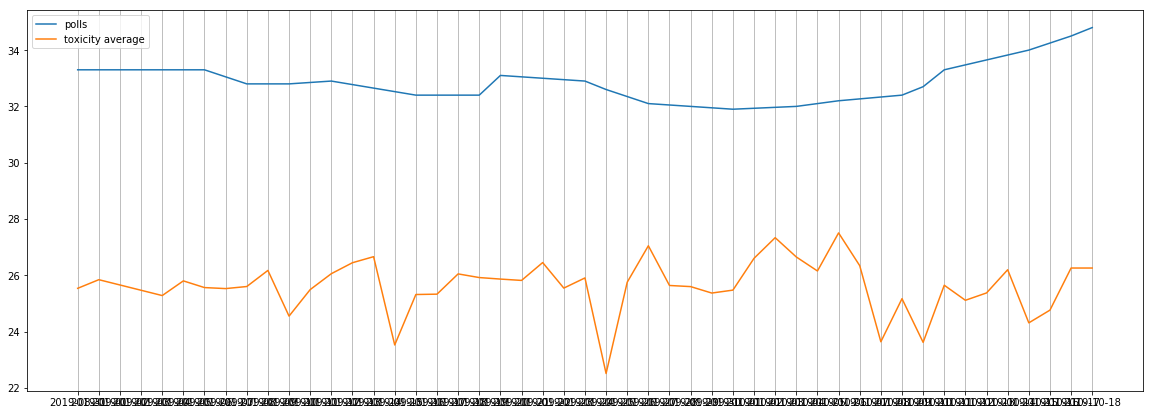

In [0]:
plt.plot(dates,interpolate_gaps(pol1),label="polls")
plt.plot(dates,(30-30*interpolate_gaps(resul)),label="toxicity average")
plt.grid(axis="x")
plt.legend()

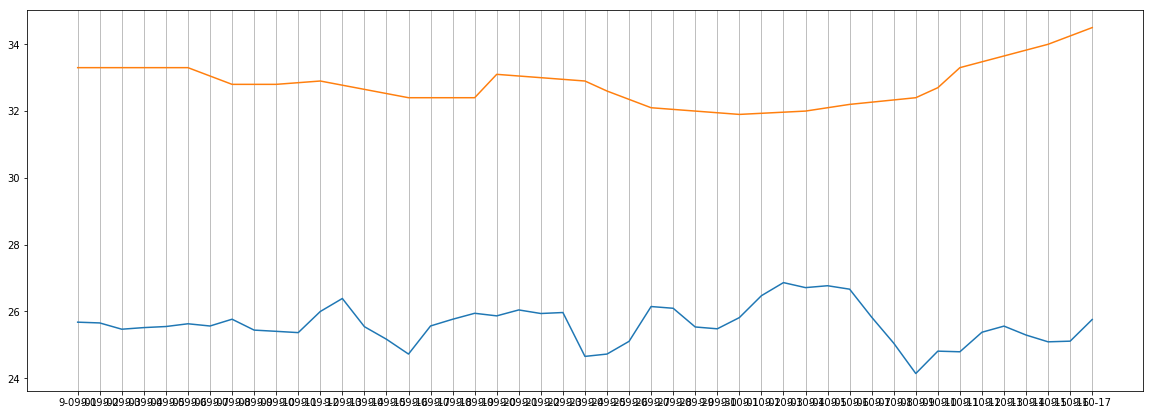

In [0]:
y1=np.convolve((30-30*interpolate_gaps(resul)),np.ones(3)/3,mode='valid')
y2=np.convolve(interpolate_gaps(pol1),np.ones(3)/3,mode='valid')
plt.plot([date[3:] for date in dates[1:-1]],y1,label="toxicity")
plt.plot([date[3:] for date in dates[1:-1]],interpolate_gaps(pol1[1:-1]),label="polls")
plt.grid(axis="x")
plt.ioff()

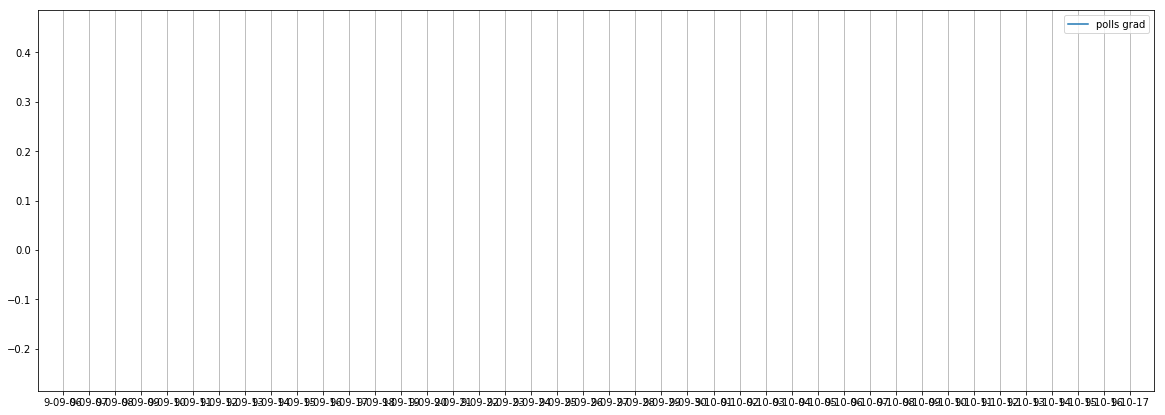

In [0]:
z1=np.gradient(y1)
z2=np.gradient(pol1[1:-1])
#plt.plot([date[3:] for date in dates[1:-1]],z1,label="toxicity grad")
plt.plot([date[3:] for date in dates[1:-1]],z2,label="polls grad")
plt.legend()
plt.grid(axis="x")

In [0]:
interpolate_gaps(pol1)

array([33.3       , 33.3       , 33.3       , 33.3       , 33.3       ,
       33.3       , 33.3       , 33.05      , 32.8       , 32.8       ,
       32.8       , 32.85      , 32.9       , 32.775     , 32.65      ,
       32.525     , 32.4       , 32.4       , 32.4       , 32.4       ,
       33.1       , 33.05      , 33.        , 32.95      , 32.9       ,
       32.6       , 32.35      , 32.1       , 32.05      , 32.        ,
       31.95      , 31.9       , 31.93333333, 31.96666667, 32.        ,
       32.1       , 32.2       , 32.26666667, 32.33333333, 32.4       ,
       32.7       , 33.3       , 33.475     , 33.65      , 33.825     ,
       34.        , 34.25      , 34.5       , 34.8       ])

In [0]:
z2

array([  nan,   nan,   nan,   nan,   nan,   nan, -0.25,   nan,  0.  ,
         nan,  0.05,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan, -0.25,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,  0.1 ,   nan,
         nan,   nan,   nan,  0.45,   nan,   nan,   nan,   nan,   nan,
        0.25,   nan])

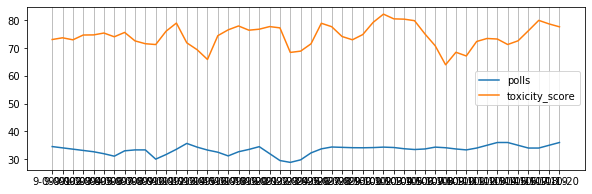

In [0]:
y1=np.convolve((100*interpolate_gaps(resul_freq)-100*interpolate_gaps(resul)),np.ones(3)/3,mode='valid')
y2=np.convolve(interpolate_gaps(pol),np.ones(3)/3,mode='valid')
y3=np.convolve((100*interpolate_gaps(resul)),np.ones(3)/3,mode='valid')

plt.plot([date[3:] for date in dates[1:-1]],y2,label="polls")
plt.plot([date[3:] for date in dates[1:-1]],y1,label="toxicity_score")
plt.legend()
plt.grid(axis="x")
plt.ioff()